# Learning of constraints


## Objective
This notebook contains a very simple example showing how to train a feedforward neural network to learn how to explain its predictions.


## Outline
- [Objective](#Objective)
- [Problem description](#Problem-description)
    - [The course of the black box](#The-course-of-the-black-box)
    - [How to train like an adult](#How-to-train-like-an-adult)
    - [Learning of constraints](#Learning-of-constraints)
    - [Multi-label classification](#Multi-label-classification)
- [Libraries](#Libraries)
- [Dataset](#Dataset)
- [Learning concepts](#Learning-concepts)
- [**Explaining concepts**](#Explaining-concepts)
- [References](#References)


## Problem description


### The course of the black box
**Humans don't like black boxes**. We all (*humans*) suffer of incredulity. This cognitive bias prevents us from relying upon something we don't understand. In finding the trade-off between complexity and accuracy, we are often biased towards simple solutions. That's why we (*humans*) don't like deep learning. It's the Occam's razor revenge. Machine learning researchers are usually worried about the course of the dimensionality. But we actually need to realize that one of the main issues that is limiting deep learning applications is being a black box. The [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) has coursed neural networks. **It's the course of the black box**.

What is the actual issue here? Are neural networks intrinsically coursed? They are just optimizers with a scandalous number of parameters after all. How could we interpret a nonlinear decision function with millions of parameters? Well, in some sense we are doing it every single day, don't we? Human decisions and reasoning are a function of our brain and mind. Would this function have less parameters than an *artificial neural network*? I don't think so. So, what's the difference? Why do we trust our grannies but not our deep learning models? I think the main difference here is that our grannies can **explain** themselves. They can provide us a step-by-step explanation, *a logical reasoning*$^1$ that can help us understand what they are saying. Our nets don't do that... Nay, we dind't ask them! But how could we? 

Let's step back a little. Let's define what we *really* want to ask them (our nets, not our grannies).

$^1$: it depends on your granny...

### How to train like an adult
So, what do we *really* want? I think the problem is that we are training our networks like a child. So now we get answers as from a child. Would you blame your child because his/her answers are not logically sound? That would be ridiculous if not inappropriate. We need a paradigm shift. **Instead of training our net like a child, why don't train it like an adult?** What's the difference? We need to teach them logic. So, let's start with defining what kind of logic we need them to learn about.

In most cases, researchers might be interested in scientific interpretability. One way of thinking about scientific interpretability is in terms of logic. **A (*scientific*) argument is interpretable from a human standpoint, if it can be described by a limited set of concepts linked by logical rules**. A simple example is the syllogism:

> All men are mortal.
> 
> Socrates is a man.
>
> Therefore, Socrates is mortal.

So now our problem is: **how to make a neural network learn how to explain its predictions logically**?



### Learning of constraints
We can divide the problem into **3 steps**.

**First**, we need to teach our neural network basic concepts. How? As usual, just pick a problem and train your network (let's call it $N1$). We are now in the so called "concept space". For instance, the "perceptual space" of MNIST is an image of a digit, while the "concept space" is the "label" of that image, the digit, the abstract concept represented by the image. We, *humans*, tend to reason in this "concept space" rather than in our perceptual space. That's what we want from our net! So...

**Second**, we need to teach our network the logical relationships between concepts. How? One option is to use (by an ironic twist of fate) another neural network! Let me give you a simple example. Let's say we have trained our network $N1$ to recognize the following concepts: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, even, and odd. Let's say we are interested in understanding interpreting the prediction "even". In other words, we want to understand how our network is interpreting the concept "even" with respect to the other concepts. The idea is to train another neural network $N2$ taking as inputs the predictions of the network $N1$ and having just one output representing the concept "even". So now we have a neural network ($N2$) learning the concept "even" using the concepts: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, and odd (we need to drop "even" as we might have ended up with a tautology!).

**Third**, we need to ask our network for a logical explanation. How? That's the fun part. We are going to generate the **truth table** of the network $N2$, representing its logical reasoning. Let's do it step by step:
1. generate an artificial dataset in the concept space representing **all possible combinations of truth values taken by each concept**. To make it easier, we will assume that each concept can just take 2 truth values: TRUE and FALSE.
2. feed the network $N2$ with this table.
3. The output of the network will represent the truth degree of each combination of concepts.

For instance, let's take the combination:

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | odd |
|-|-|-|-|-|-|-|-|-|-|-|
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |

If for this input the network predicts "even" with probability $\approx 0$, we might have just discovered something new! That is: "odd" $\implies$ not "even". That's a new concept!

Let's take another input:

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | odd |
|-|-|-|-|-|-|-|-|-|-|-|
| 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |

If for this input the network predicts "even" with probability $\approx 1$, we might have just discovered something new again! That is: "two" $\implies$ "even". That's another new concept!

So now we have a very simple way of interrogating our deep learning model! We can ask for explanations and we can extract general logical rules representing its decisions.



### Multi-label classification
In order to show a concrete example, in this notebook we consider a generic [**multi-label classification problem**](https://en.wikipedia.org/wiki/Multi-label_classification), that is a learning problem where each input example belongs to one or more classes. 

We focus on **neural network-based** methods, that implicitly learn from supervisions.

More formally, we consider data belonging to the **perceptual space** $x \in \mathbb{R}^d$. Each sample $x$ is also associated with a boolean vector $y \in \mathbb{R}^n$. For any $x$, $y_i \in \{0, 1\}$ represents the membership degree of the example $x$ to the $i$-th class.

We consider a multi-output feedforward neural network classifier. Each output unit is associated to a **task function** $f_i: \mathbb{R}^d \rightarrow [0,1]$, for $i=1,...,n$, that predicts how strongly an input example belongs to the considered class. For any $x \in X$, $\hat{y}_i = f_i(x) \in [0, 1]$ represents the *predicted* membership degree of the example $x$ to the $i$-th class. We indicate with $f(x)$ the function that returns the $n$-dimensional vector $\hat{y} \in \mathbb{R}^n$ with the outputs of all the task functions. Such vector belongs to the so-called **concept space**.

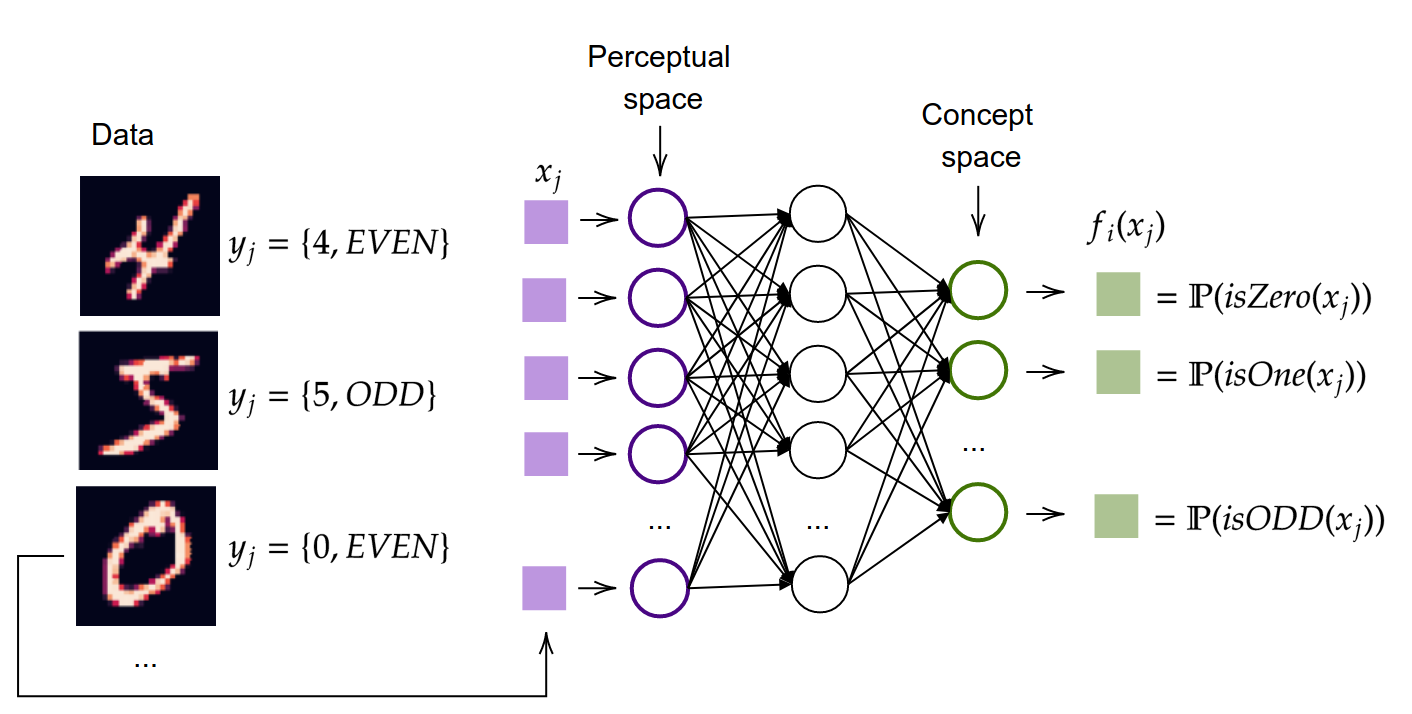

This is the "standard network" learning basic concepts. Let's now consider another network $\psi_h: \mathbb{R}^{n-1} \rightarrow [0,1]$ whose input domain is the concept space (except for the target concept) and whose output represents the truth degree of the concept we want to explain.

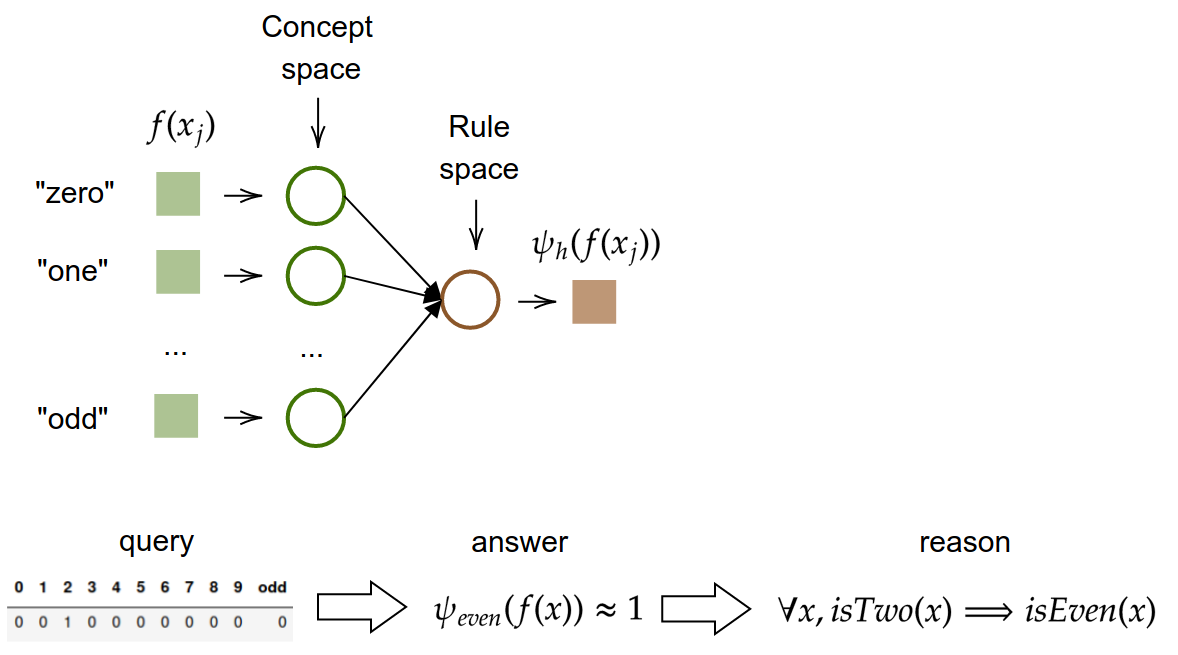

Let's now dive into the code...

## Libraries
First we need to import some useful libraries:

In [1]:
import torch
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product
import pandas as pd

## Dataset

In this notebook we will use a simplified version of the MNIST dataset called DIGITS. Each sample $x_i$ is an $8 \times 8$-pixels' handritten image representing a digit, while the supervision $y_i$ represents its numeric value.

We can first load the dataset and have a look at some of his properties:

In [2]:
X, y = load_digits(return_X_y=True)

print(f'X shape: {X.shape}\nClasses: {np.unique(y)}')

X shape: (1797, 64)
Classes: [0 1 2 3 4 5 6 7 8 9]


As you can see, the images are flattened in a $64$-length vector, but we can easily visualize samples by reshaping the input:

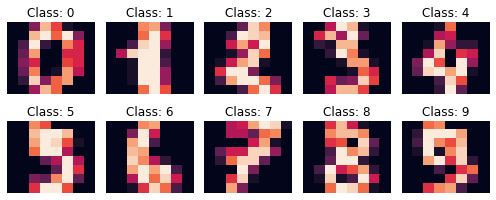

In [3]:
# show the first ten images
figs = X[:10].reshape((10, 8, 8))
plt.figure(figsize=[7, 7])
for i, fig in enumerate(figs):
    plt.subplot(5, 5, i+1)
    plt.title(f'Class: {y[i]}')
    sns.heatmap(fig, cbar=False)
    plt.axis('off')
plt.tight_layout()
plt.show()

As we are framing our problem as a multi-task classification problem, we need to encode our supervisions in a one-hot representation:

In [4]:
enc = OneHotEncoder()
y1h = enc.fit_transform(y.reshape(-1, 1)).toarray()

print(f'Before: {y.shape}\nAfter: {y1h.shape}')

Before: (1797,)
After: (1797, 10)


To make it more fun, we will add two additional task functions: ODD (11-th column) and EVEN (12-th column).

In [5]:
y2 = np.zeros((len(y), 2))
for i, yi in enumerate(y):
    if yi % 2:
        y2[i, 0] = 1
    else:
        y2[i, 1] = 1
y1h2 = np.hstack((y1h, y2))

print(f'Target vector shape: {y1h2.shape}')
for i in range(10):
    print(f'Example ({y[i]}): {y1h2[i]}')

Target vector shape: (1797, 12)
Example (0): [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Example (1): [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Example (2): [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Example (3): [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
Example (4): [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
Example (5): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
Example (6): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
Example (7): [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
Example (8): [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
Example (9): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]


We are now ready to split our dataset into a training and a test set:

In [6]:
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y1h2, test_size=0.33, random_state=42)

Finally, we need to transoform our data into torch tensors to be processed by the network:

In [7]:
x_train = torch.FloatTensor(X_train_np)
y_train = torch.FloatTensor(y_train_np)
x_test = torch.FloatTensor(X_test_np)
y_test = torch.FloatTensor(y_test_np)

## Learning concepts
We will use a very simple (and quite standard) feedforward neural network with three layers, ReLU activations, and $12$ output units (one for each task function) with sigmoid activations. We are not using softmax as in our problem more than one predicate on the task function can be true at the same time (e.g. $isTwo(x)$ and $isEven(x)$ should be true at the same time).

In [8]:
class FeedForwardNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(FeedForwardNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h = self.linear1(x)
        h = torch.nn.functional.relu(h)
        h = self.linear2(h)
        h = torch.nn.functional.relu(h)
        h = self.linear3(h)
        y_pred = torch.sigmoid(h)
        return y_pred

We can now generate an instance of the network:

In [9]:
din, dh, dout = x_train.shape[1], 20, y_train.shape[1]
model = FeedForwardNet(din, dh, dout)

print(model)

FeedForwardNet(
  (linear1): Linear(in_features=64, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=12, bias=True)
)


The train loop is quite standard:

In [10]:
loss = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()
epoch = 2000
for epoch in range(epoch):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_train)
    y_pred_np = y_pred.detach().numpy()

    # Compute Loss
    tot_loss = loss(y_pred, y_train)

    # compute accuracy
    y_pred_d = (y_pred > 0.5).detach().numpy()
    accuracy = ((y_pred_d == y_train_np).sum(axis=1) == y_train_np.shape[1]).mean()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch + 1}: '
              f'total loss: {tot_loss.item():.4f} '
              f'| accuracy: {accuracy:.4f} ')

    # Backward pass
    tot_loss.backward()
    optimizer.step()

Epoch 1: total loss: 0.9068 | accuracy: 0.0000 
Epoch 101: total loss: 0.0297 | accuracy: 0.9244 
Epoch 201: total loss: 0.0066 | accuracy: 0.9884 
Epoch 301: total loss: 0.0022 | accuracy: 0.9992 
Epoch 401: total loss: 0.0009 | accuracy: 1.0000 
Epoch 501: total loss: 0.0005 | accuracy: 1.0000 
Epoch 601: total loss: 0.0003 | accuracy: 1.0000 
Epoch 701: total loss: 0.0002 | accuracy: 1.0000 
Epoch 801: total loss: 0.0001 | accuracy: 1.0000 
Epoch 901: total loss: 0.0001 | accuracy: 1.0000 
Epoch 1001: total loss: 0.0001 | accuracy: 1.0000 
Epoch 1101: total loss: 0.0001 | accuracy: 1.0000 
Epoch 1201: total loss: 0.0001 | accuracy: 1.0000 
Epoch 1301: total loss: 0.0000 | accuracy: 1.0000 
Epoch 1401: total loss: 0.0000 | accuracy: 1.0000 
Epoch 1501: total loss: 0.0000 | accuracy: 1.0000 
Epoch 1601: total loss: 0.0000 | accuracy: 1.0000 
Epoch 1701: total loss: 0.0000 | accuracy: 1.0000 
Epoch 1801: total loss: 0.0000 | accuracy: 1.0000 
Epoch 1901: total loss: 0.0000 | accuracy: 

Once the network is trained we can compute the test accuracy:

In [11]:
y_pred = model(x_test)

# compute accuracy
y_pred_round = (y_pred > 0.5).to(torch.float).detach().numpy()
accuracy = ((y_pred_round == y_test_np).sum(axis=1) == y_test_np.shape[1]).mean()

print(f'accuracy: {accuracy:.4f}')

accuracy: 0.9125


## Explaining concepts
Let's now focus on the concept "even". Our objective is to find an explanation for "even" predictions. What "even" means in terms of the other task functions?

Let's first define the $\psi$ function as a one-layer feedforward neural network with $n-1$ input (one for each task function except for $f_{even}$) and one output representing the truth degree of the concept "even".

In [12]:
class ExplainEven(torch.nn.Module):
    def __init__(self, D_in):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(ExplainEven, self).__init__()
        self.linear = torch.nn.Linear(D_in, 1)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h = self.linear(x)
        y_pred = torch.sigmoid(h)
        return y_pred

We can now generate the training set for this network. It is just the discretized output of the previous network:

In [22]:
y_pred_train = model(x_train).detach().numpy().astype(float)
y_pred_test = model(x_test).detach().numpy().astype(float)

x_concepts_train_np, y_concepts_train_np = y_pred_train[:, :-1], y_pred_train[:, -1]
x_concepts_test_np, y_concepts_test_np = y_pred_test[:, :-1], y_pred_test[:, -1]

x_concepts_train, y_concepts_train = torch.FloatTensor(x_concepts_train_np), torch.FloatTensor(y_concepts_train_np)
x_concepts_test, y_concepts_test = torch.FloatTensor(x_concepts_test_np), torch.FloatTensor(y_concepts_test_np)

We are now ready to train our ExplainNet:

In [40]:
D_in = y_pred_train.shape[1] - 1
even_net = ExplainEven(D_in)
print(even_net)

optimizer = torch.optim.Adam(even_net.parameters(), lr=0.01)
even_net.train()
epoch = 500
accuracy = 0
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = even_net(x_concepts_train)
    y_pred_np = y_pred.detach().numpy()

    # Compute Loss
    tot_loss = loss(y_pred, y_concepts_train) + 0.2 * even_net.linear.weight.norm(1)

    # compute accuracy
    y_pred_d = (y_pred > 0.5).detach().numpy().ravel()
    accuracy = (y_pred_d == (y_concepts_train_np>0.5)).mean()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch + 1}: '
              f'total loss: {tot_loss.item():.4f} '
              f'| accuracy: {accuracy:.4f} ')

    # Backward pass
    tot_loss.backward()
    optimizer.step()

ExplainEven(
  (linear): Linear(in_features=11, out_features=1, bias=True)
)
Epoch 1: total loss: 1.0503 | accuracy: 0.5894 
Epoch 101: total loss: 0.6755 | accuracy: 1.0000 
Epoch 201: total loss: 0.6762 | accuracy: 1.0000 
Epoch 301: total loss: 0.6764 | accuracy: 1.0000 
Epoch 401: total loss: 0.6752 | accuracy: 1.0000 


/home/pietro/anaconda3/envs/dev/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1203])) that is different to the input size (torch.Size([1203, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


## Rule extraction
Let's now find out how can we extract logical rules.

Lets just focus on a subset of weights (the ones representing strongest connections among concepts):

In [50]:
weights = [even_net.linear.weight.detach().numpy().copy()]
bias = [even_net.linear.bias.detach().numpy()]
weights[0][weights[0] > 0] = 0
weights

[array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -2.4317820e-03,
         -1.2949551e-04,  0.0000000e+00,  0.0000000e+00, -4.3199572e-05,
         -2.1805725e-04, -1.5509470e-03, -8.0929589e-01]], dtype=float32)]

Now let's use the corresponding concepts to extract the rules:

In [51]:
from intoCNF import booleanConstraint
f = booleanConstraint(weights,bias)
f

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']


['(~f11)']

For very complex rules, we can use sympy to get more simple formulas:

In [52]:
from sympy.logic import simplify_logic
sf = simplify_logic(f[0])
sf

~f11

Now recall that the 11th concept was represented by $isOdd$.

Nice! We have just learnt that our black box has learnt a very interesting concept: $\neg isOdd(x) \implies isEven(x)$!

That's all folks!

## References

Gori, M. (2017). Machine Learning: A constraint-based approach. Morgan Kaufmann.

Marra, G., Giannini, F., Diligenti, M., & Gori, M. (2019). Lyrics: a general interface layer to integrate ai and deep learning. arXiv preprint arXiv:1903.07534.

Ciravegna, G., Giannini, F., Gori, M., Maggini, M., & Melacci, S. Human-Driven FOL Explanations of Deep Learning. In 29th International Joint Conference on Artificial Intelligence (pp. 2234-2240).